# DS2500 Day 17

Mar 17, 2023

#### Content
- Overfitting (super briefly)
- Clustering
    - K-means
    - How do we pick a k for k-means clustering?  
        - ... similar to how we pick a polynomial order, but not exactly
- Principal Component Analysis
    - removes correlation between features
    - attempts to "squish" many features into a fewer features
        - loses fidelity to original features (fewer features are only an approximation of the many)
        - you can build a 2-feature scatter "map" of N > 2 features, nifty for data viz


# Overfitting


# Overfitting: Post-Mortem

What went wrong here?

According to this model, we'd predict some new, unseen data point with $x \approx 1.8$ would have an estimate of $\hat{y} \approx -3$.  

<img src="https://i.ibb.co/sP76DKd/overfit-poly.png" width=400px>

**Overfitting:** When a model (over)fits the given training data in a way which harms performance on some new, unseen datapoint.  

Overfitting is characterized:
- qualitatively
    - the model has behaviors which isn't expected of new samples
        - "upside cat ears" above
- quantitatively
    - performance on unseen data is lowered
        - cross validation


# Preventing overfitting:

|                          |                            Underfitting                            |                            Proper fitting                           |                            Overfitting                            |
|:------------------------:|:------------------------------------------------------------------:|:-------------------------------------------------------------------:|:-----------------------------------------------------------------:|
| Training Set Performance |                                 Bad                                |                                 Good                                |                              Suspiciously Good                             |
|  Testing Set Performance |                                 Bad                                |                            About as good                            |                                Bad                                |
|     Model Complexity     |                               Simple                               |                         balanced                         |                           Overly complex                          |
|                          | <img src="https://i.ibb.co/sPTY37G/underfit-poly.png" width=250px> | <img src="https://i.ibb.co/HYGHxvm/justright-poly.png" width=250px> | <img src="https://i.ibb.co/sP76DKd/overfit-poly.png" width=250px> |

In many problems, we are building the classifier / regression model to predict new, unseen samples.  Given this:

**"proper fit" is the model which maximizing the performance on a testing set (e.g. cross validated accuracy or cross validated $r^2$)**


# Clustering


## What does Clustering do?

It identifies sub-groups within a population.

It doesn't necessarily find the sub-groups with some particular application meaning (e.g. penguin species below)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


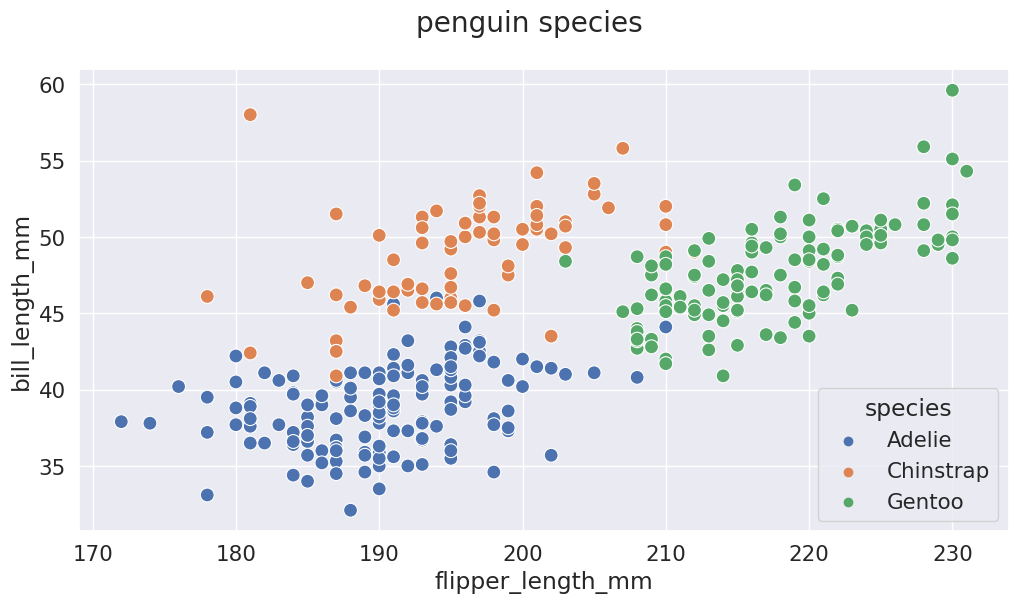

In [2]:
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, how='any', inplace=True)

sns.set(font_scale=1.4)
sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', hue='species', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('penguin species');


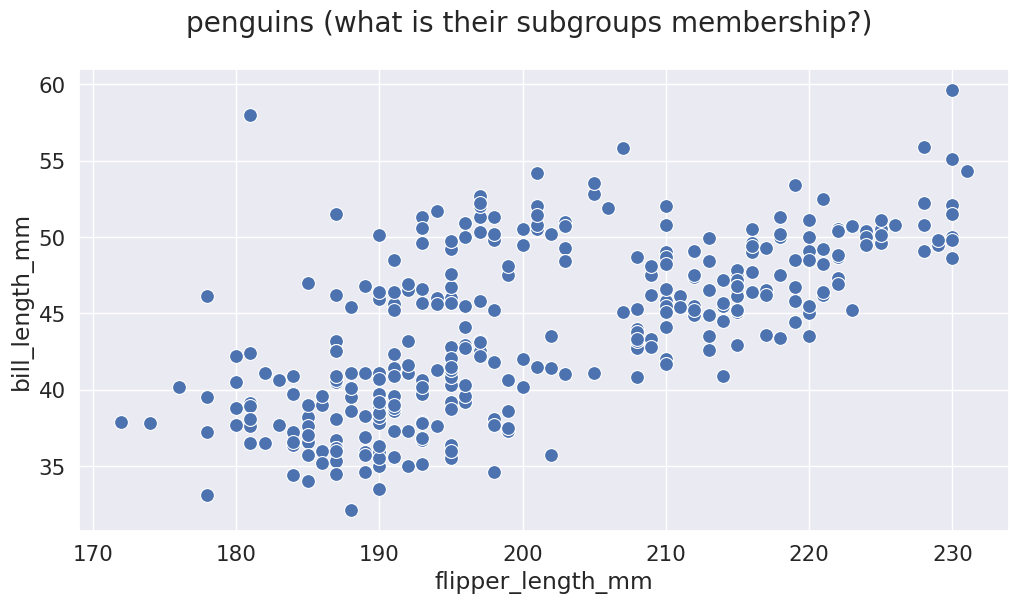

In [3]:
sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('penguins (what is their subgroups membership?)');


## Clustering examples:
Clustering partitions a set of samples into clusters with similar characteristics:

- **Disease characterization**
    - Given a population of clinical features of people with Schizophrenia:
        - severeity of symptoms
        - clinical scores
            - physical, emotional, cognitive symptoms
        - brain imaging
        - disease progression
            - age onset
    - Maybe we can identify k distinct sub-types of "Schizophrenia".  (Is it really one disease or maybe it is many diseases which science cannot yet distinguish?)
    
- **Network Analysis**
    - Given a measure of distance between users in a social network:
        - number of messages between each pair of users
    - can we identify cliques?
        - clique: subgroups of people who often communicate with each other
    
- **Email filtering**
    - Given features about email
        - domain of sender
        - user response time
        - keyword inclusion
            - ✔️𝐀𝐂𝐓 𝐍𝐎𝐖, 𝖦𝖾𝗍 $𝟤𝟧𝟢,𝟢𝟢𝟢 𝗈𝖿 𝖳𝖾𝗋𝗆 𝖫𝗂𝖿𝖾 𝖢𝗈𝗏𝖾𝗋𝖺𝗀𝖾 𝖺𝗌 𝗅𝗈𝗐 𝖺𝗌 $𝟣𝟧/𝖬𝗈👀
    - Can we identify subgroups of email to automatically sort them for users?
        - personal email
        - professional email
        - spam
        - some other group of emails which is user specific


## Happy Birthday K-Means Clustering!

### Goal:
- Celebrate birthdays on only k days of the year for N total people 
    - k < N so that at least one celebration is shared among people
- Ensure celebration days are as close as possible to actual birthdays (on average across people)

### Notes: 
- its helpful to represent a birthday as "days since start of year"
    - see cell below
- We will celebrate this year's birthdays this year (other year celebrations can't be used!)
    - birthday on Jan 1 (`days_bday=1`), celebrated on Dec 31 (`days_celebrate=365`)
        - has distance `364`


In [4]:
from datetime import date

year_start = date(year=2022, month=1, day=1)

# put in your birthday below (or make one up)
bday_2022 = date(year=2022, month=7, day=1)

bday_days = (bday_2022 - year_start).days
bday_days


181

# K-Means Clustering

Approach:
- alternate between:
    - pick cluster centers (centroids) as the average of all samples in each cluster
    - assign each sample to the closest cluster centroid

## Demo 1
Shows each step above seperately: 

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
 
## Demo 2
Nicer data / interactivity:

https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/


# K-Means Clustering (detail)

### Approach:
- alternate between:
    - pick cluster centers (centroids) as the average of all samples in each cluster
    - assign each sample to the closest cluster center
    
### Q1: How do I pick the initial centroids?
Either:
- randomly
- pick the k-th cluster centroid as the furthest sample from first k-1 centroids

### Q2: How do you measure if your clustering did a good job?

### Q3: Will K-Means eventually stop iterating?

### Q4: How do I pick a K which is best for my data?


# Q2: How do we measure how good the clustering is?

Bad clustering (lines from samples to centroids are long)
<img src="https://i.ibb.co/Qj6sxVz/cluster-bad.png" width=450px>

Good clustering (lines from samples to centroids are short)
<img src="https://i.ibb.co/2gmCmcV/cluster-good.png" width=450px>

A good clustering gives centroids which are close to each of the samples which belong to its cluster.

We can quantify the quality of a clustering by computing the average line length (squared distance from each sample to its centroid):

$$\frac{1}{N} \sum_i \sum_{x_j \in i} ||x_j - c_i||^2 $$

where $N$ is the number of observations, $c_i$ is the cluster centroid of cluster $i$ and $x_j \in i$ are all the samples $x_j$ which are in cluster $i$.


# Q3: Will K-Means Clustering eventually stop iterating?

Yes, its garaunteed to! :)

### Definition:

**"Clustering"**: a particular assignment of samples to k sub-groups

#### Proof Sketch:

##### Idea 1: We'll never return to a particular clustering as we update
K-means approach:
- alternate between:
    - pick cluster centers as the average of all samples in each cluster
        - **this moves cluster centers closer, on average, to the points in their cluster**
    - assign each sample to the closest cluster center
        - **this moves cluster centers closer, on average, to the points in their cluster**

##### Idea 2: There is a finite amount of clusterings 
$N^k$ for $N$ samples and $k$ clusters

##### Putting it together:
Given we can't repeat any of the clusterings, we'll eventually run out and K-means will stop.


## K-means: implementation


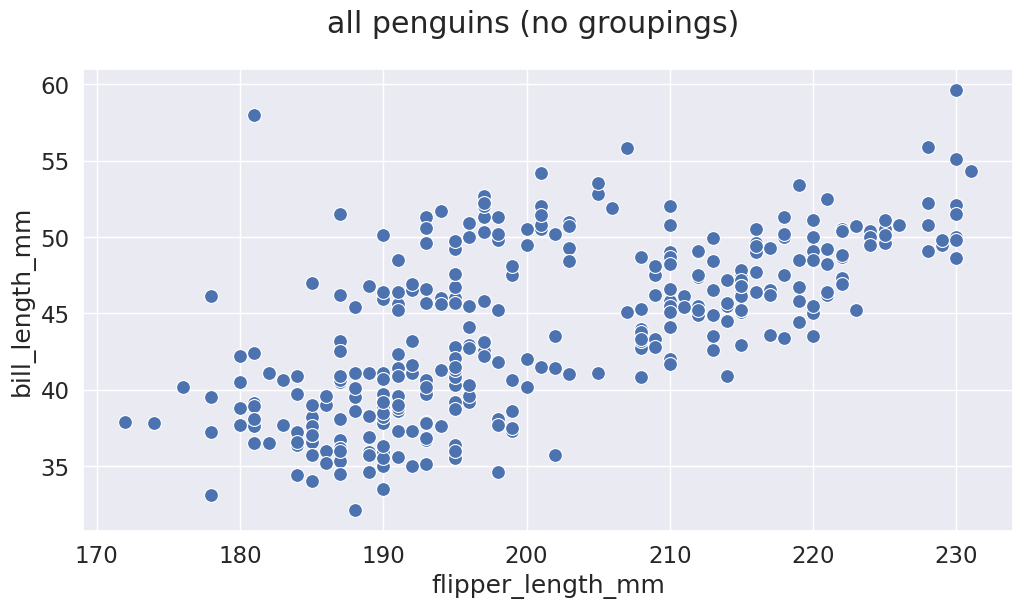

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, how='any', inplace=True)

sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('all penguins (no groupings)');


In [6]:
from sklearn.cluster import KMeans

# k in k-means describes the number of clusters
n_clusters = 3

# extract x features (define distance between samples)
x_feat_list = ['flipper_length_mm', 'bill_length_mm']
x = df_penguin.loc[:, x_feat_list].values

# perform clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)


/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0.98, 'clusters of penguins (similar features)')

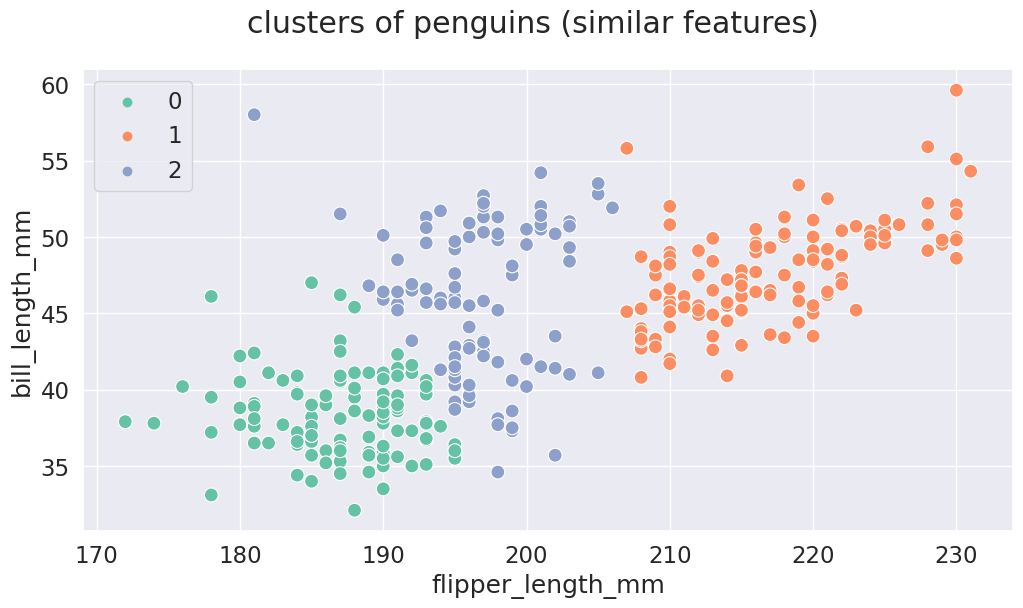

In [7]:
sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', s=100, hue=y, palette='Set2')
plt.gcf().set_size_inches(12, 6)
plt.suptitle('clusters of penguins (similar features)')


Text(0.5, 0.98, 'actual species of penguins')

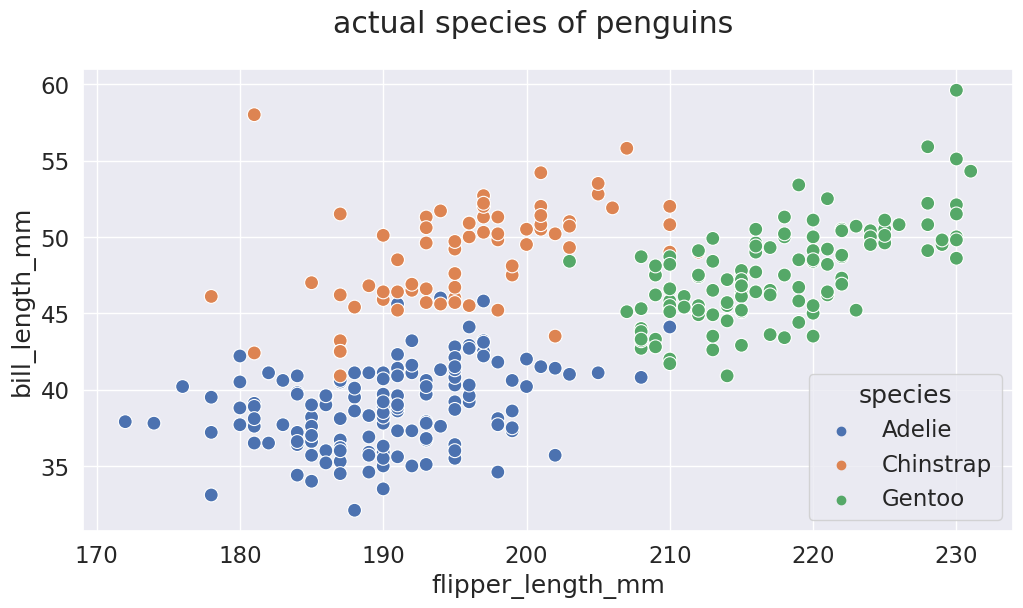

In [8]:
sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', hue='species', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('actual species of penguins')


# Clustering is unsupervised

Notice: there is no `y_true`, the ground truth target variable taken from `df_penguin` or passed to `.fit()` below:

```python
# extract x features (define distance between samples)
x_feat_list = ['flipper_length_mm', 'bill_length_mm']
x = df_penguin.loc[:, x_feat_list].values

# perform clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)
```

|                          | Input Features per sample | Output Features per sample | Supervised | Penguin Example                                                                       |
|:------------------------:|:-------------------------:|:--------------------------:|:----------:|---------------------------------------------------------------------------------------|
|           Classification | 1+ numerical features     | one categorical feature    | True       | Given `body_weight_g`, `flipper_length_mm` estimate `species`                         |
|               Regression | 1+ numerical features     | one continuous feature     | True       | Given `body_weight_g`, `bill_depth_mm` estimate `flipper_length_mm`                   |
|               Clustering | 1+ numerical features     | one categorical feature    | False      | Identify k groups of penguins which have similar `body_weight_g`, `flipper_length_mm` |
| Dimensionality Reduction | N numerical features      | < N numerical features     | False      | Find 2d vector which best represents all 4 of penguin's body/flipper/beak features    |

A **supervised** method is one whose output features are observed in some input data set.  Notice:
- To build a penguin species **classifier**, we must observe the species of penguins in our data set
- To build a **clustering** of penguins, no output feature needs to be observed


# scattering a clustering of more than 2 features ...

... yields a funny graph, why?


/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


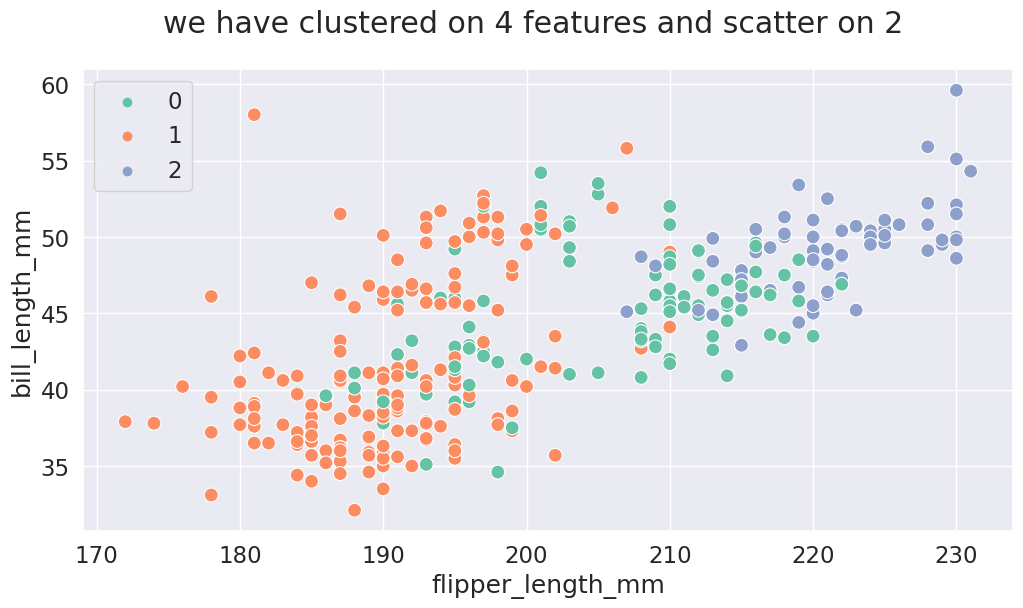

In [9]:
from sklearn.cluster import KMeans

n_clusters = 3

# note: we add all 4 features in
x_feat_list = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']
x = df_penguin.loc[:, x_feat_list].values

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', s=100, hue=y, palette='Set2')
plt.gcf().set_size_inches(12, 6)

plt.suptitle('we have clustered on 4 features and scatter on 2');


### Q4: How do I pick a K which is best for my data?

### There is no canonical "right" answer
We can't use Cross Validation in clustering as we don't have access to any ground truth $y$ ... by definition there is no "right" clustering!
    
### How does changing k impact how "good" a clustering is?
Let's observe how our clustering metric changes as $k$ increases:

$$\frac{1}{N} \sum_i \sum_{x_j \in i} ||x_j - c_i||^2 $$

which can be computed via `sklearn` as:

```python
    # kmeans.score() gets the negative mean distance to centroid
    mean_d = -kmeans.score(x)
```

(By convention, one often maximizes a "score".  Since this distance should be minimized, `sklearn` stores its negative)


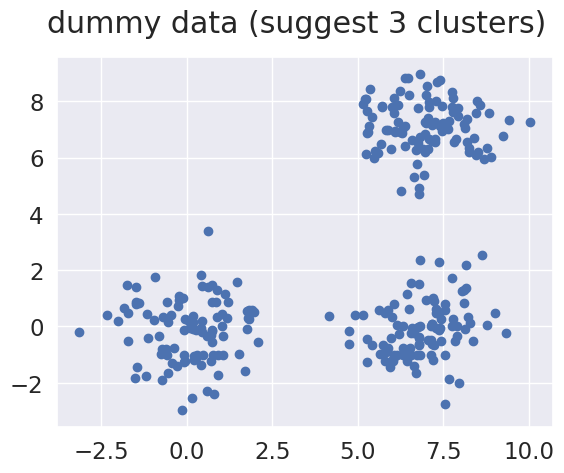

In [10]:
import numpy as np

# we generate dummy data with clean clusters (penguins don't have super clean clusterings)
x = np.vstack([np.random.multivariate_normal(mean=[0, 0], cov=np.eye(2), size=100),
               np.random.multivariate_normal(mean=[7, 0], cov=np.eye(2), size=100),
               np.random.multivariate_normal(mean=[7, 7], cov=np.eye(2), size=100)])

plt.scatter(x[:, 0], x[:, 1])
plt.suptitle('dummy data (suggest 3 clusters)');


/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-pa

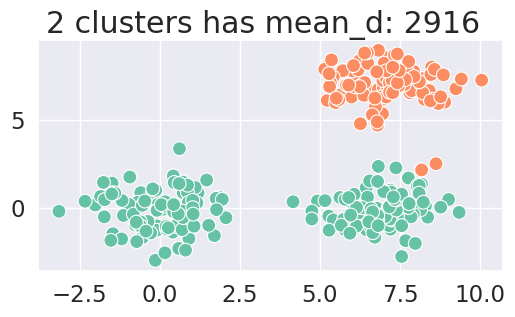

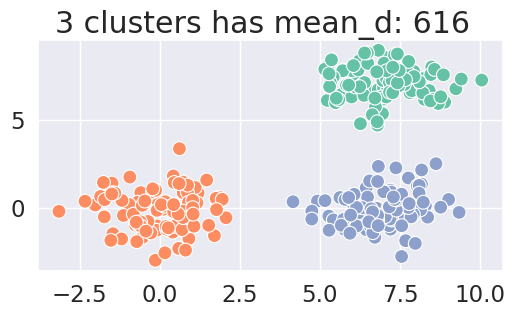

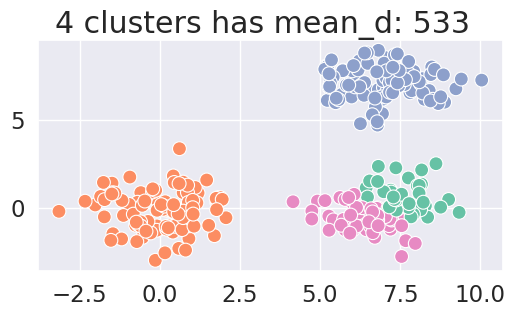

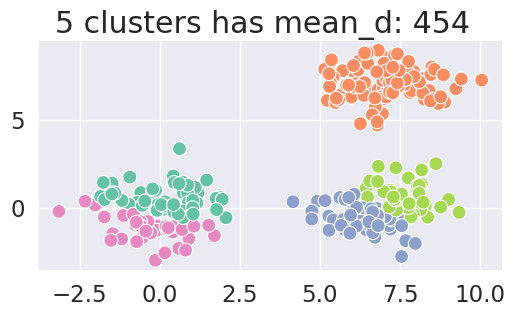

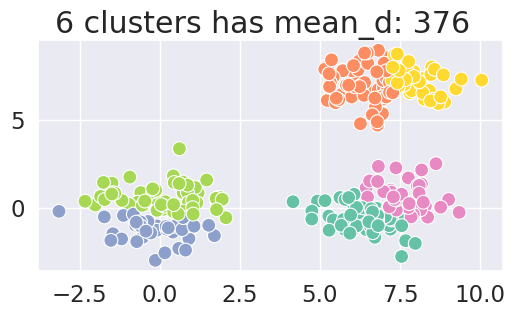

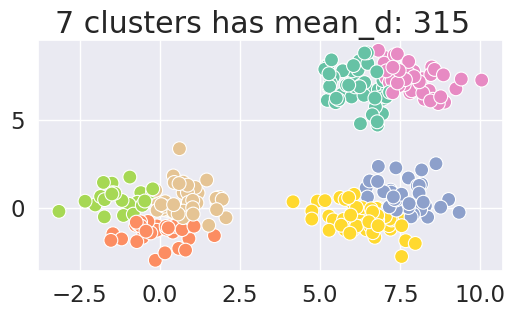

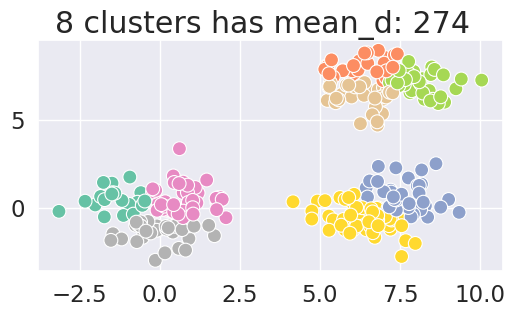

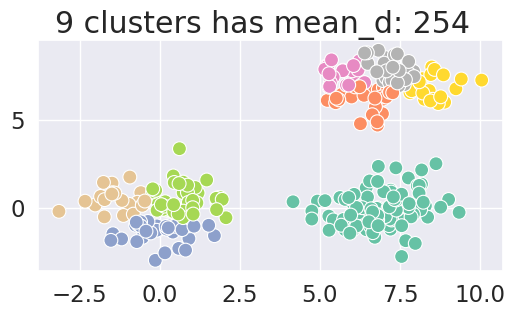

In [11]:
from sklearn.cluster import KMeans

# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
for n_clusters in range(2, 10):
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

    # plot clustering
    plt.figure()
    sns.scatterplot(x=x[:, 0], y=x[:, 1], s=100, hue=y, palette='Set2')
    plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d:.0f}')
    plt.gca().get_legend().remove()
    plt.gcf().set_size_inches(6, 3)
    


In [13]:
mean_d_dict


{2: 2965.135122094404,
 3: 594.8374521093616,
 4: 508.9249917095466,
 5: 424.8723280904164,
 6: 359.51692034027576,
 7: 315.74024511437136,
 8: 274.354913122522,
 9: 251.9684127960097}

# Choosing K:


### Bad News:
As k increases, our mean-distance-to-centroid metric will never get bigger ... we can't just choose the k which minimizes it!

# So how do I choose k then?

    “Everything should be made as simple as possible, but no simpler.” -Einsten ... sort of
    
He actually said [this](https://www.nature.com/articles/d41586-018-05004-4#:~:text=%E2%80%9CEverything%20should%20be%20made%20as,possible%20without%20having%20to%20surrender), but among quotes I vote the content of this merits it first place in line to be abridged.

"Simple as possible":

- fewest clusters

"No simpler":

- centroids should be close to their samples


Text(0, 0.5, 'mean dist^2 to centroid')

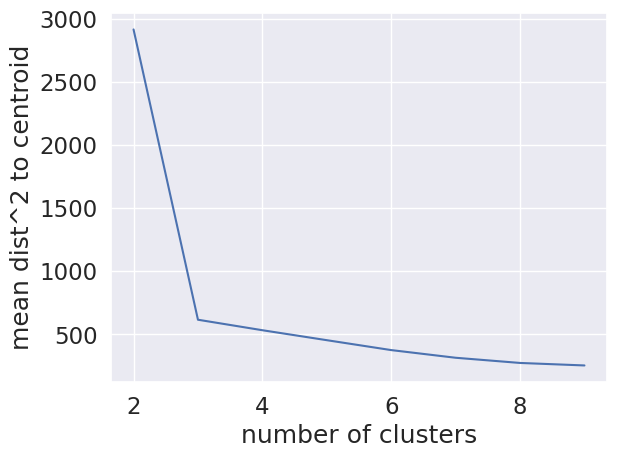

In [12]:
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean dist^2 to centroid')


3 clusters seems to have a good balance of simplicitiy (few clusters) while also ensuring centroids are close to their corresponding centroids.

This example was cooked up to have a beautiful "elbow" point at 3 clusters.  In practice, you may find yourself making an even more subjective decision.  Be rigorous where you can and when you must be subjective, be sure to have a good story / graph handy to explain why your guess is "best".


## In Class Activity 1

- Cluster the penguins data into 3 clusters
- Visualize the clusters across all features using `sns.pairplot()`
    - add your clusters as a new column of the dataframe with `df_penguin['cluster'] = y` or similar    
    - `sns.pairplot(data=df_penguin, hue='cluster', palette='Set2')`
- Which features does the clustering do a good (or bad) job of seperating? Why?  
    - Are other features ignored because of their small variance ... how can we fix this?


In [15]:
from sklearn.cluster import KMeans
    
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True, how='any')
    
df_penguin.head()


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

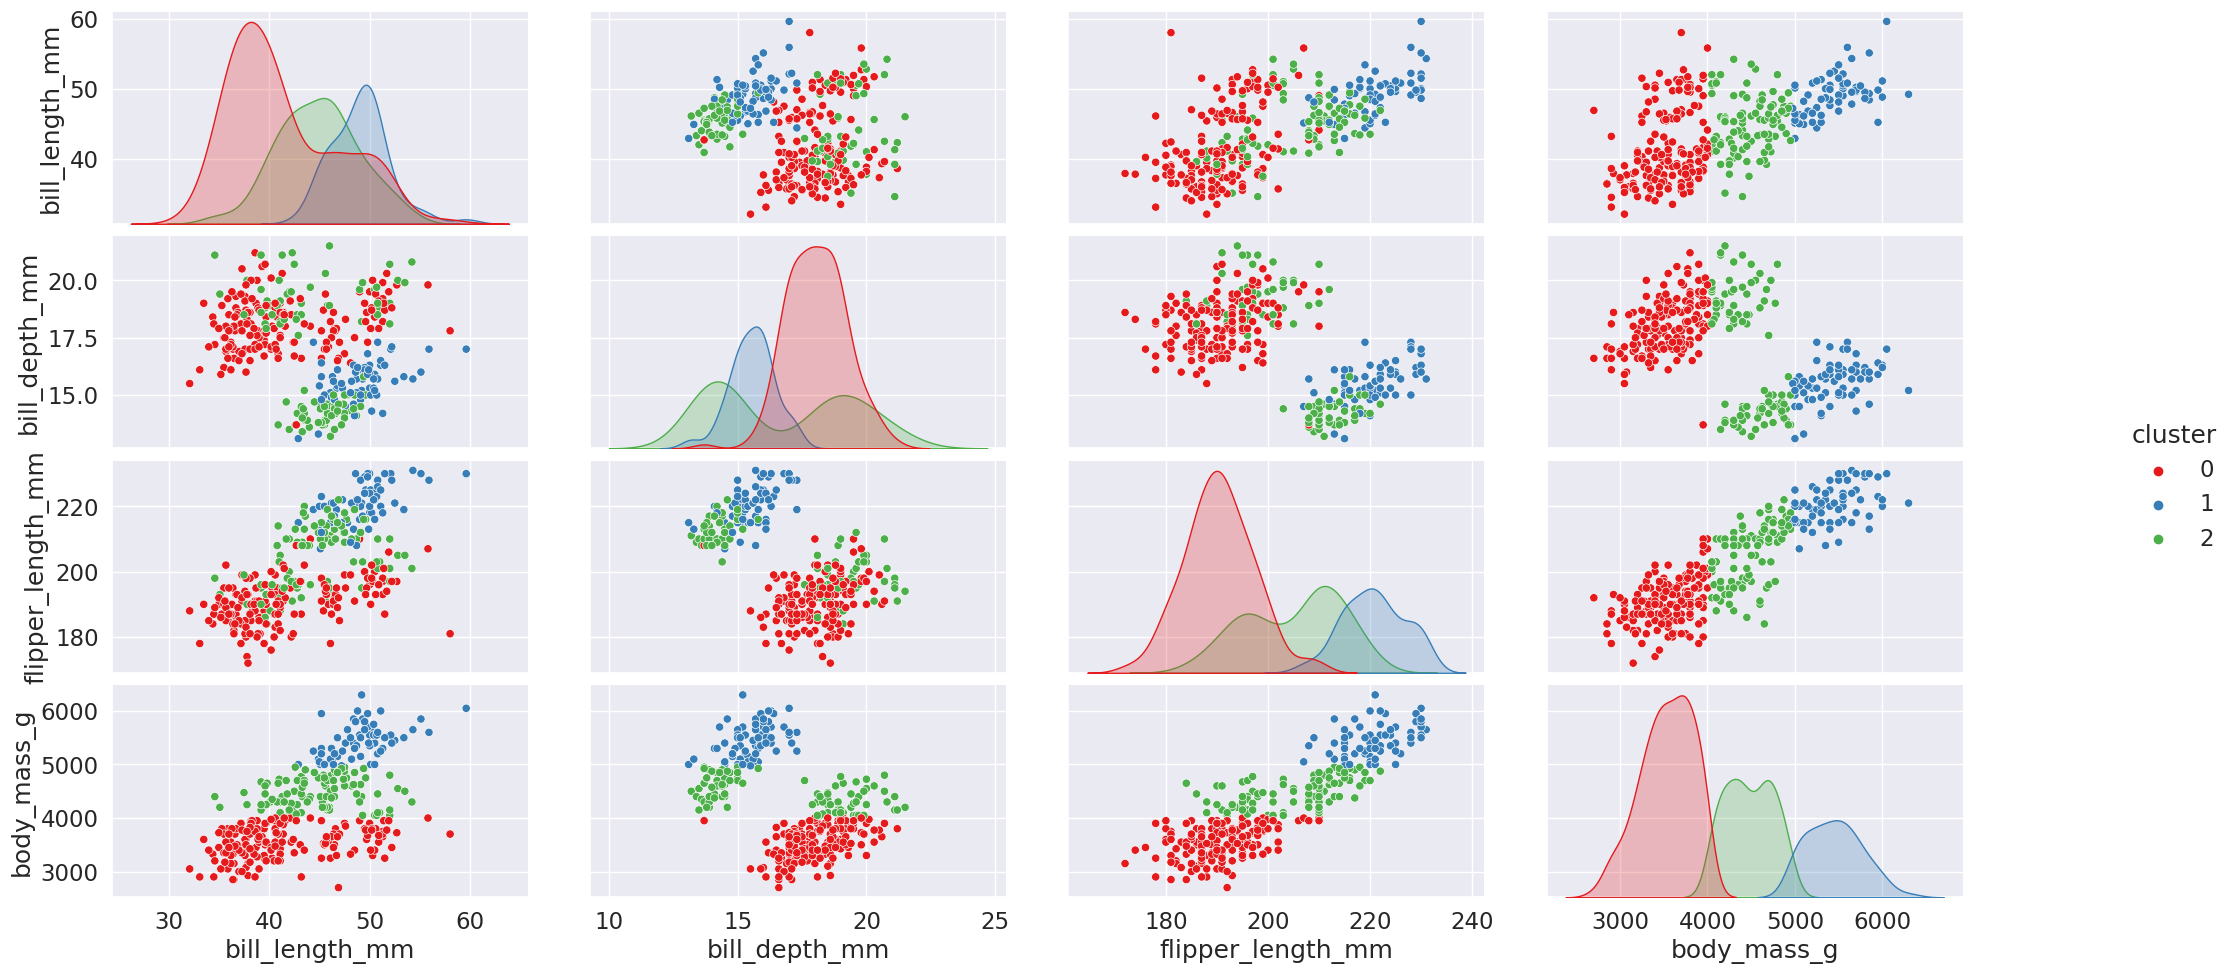

In [19]:
# extract features
x_feat_list =  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']  
x = df_penguin.loc[:, x_feat_list].values

n_clusters = 3

# fit clustering
kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(x)
# y = kmeans.predict(x)
y = kmeans.fit_predict(x)

# plot
plt.figure()
plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d:.1e}')

# makes a new column 'cluster' in dataframe
df_penguin['cluster'] = y

sns.pairplot(data=df_penguin, hue='cluster', palette='Set1');

plt.gcf().set_size_inches((24, 10));

In [20]:
df_penguin.var()

/tmp/ipykernel_26321/2064821310.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_penguin.var()


bill_length_mm           29.906333
bill_depth_mm             3.877888
flipper_length_mm       196.441677
body_mass_g          648372.487699
cluster                   0.757589
dtype: float64

In [21]:
x_feat_list =  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']  

x = df_penguin.loc[:, x_feat_list].values

# scale normalization
x = x @ np.diag(1 / x.std(axis=0, ddof=1))

np.cov(x.T)


array([[ 1.        , -0.22862564,  0.65309564,  0.58945111],
       [-0.22862564,  1.        , -0.5777917 , -0.47201566],
       [ 0.65309564, -0.5777917 ,  1.        ,  0.8729789 ],
       [ 0.58945111, -0.47201566,  0.8729789 ,  1.        ]])

/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

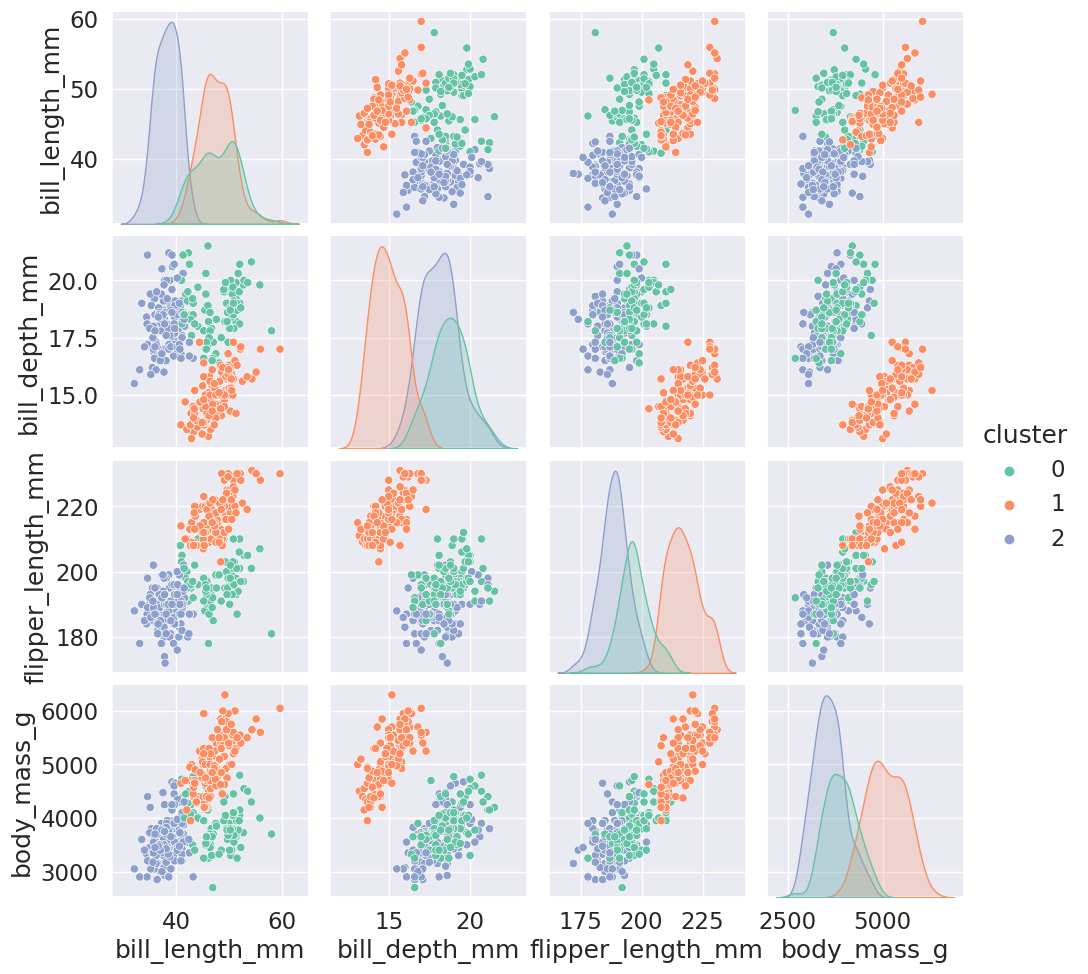

In [22]:
x_feat_list =  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']  
x = df_penguin.loc[:, x_feat_list].values

# scale normalization
x = x @ np.diag(1 / x.std(axis=0))

# fit clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

# plot
plt.figure()
plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d:.1e}')
df_penguin['cluster'] = y
sns.pairplot(data=df_penguin, hue='cluster', palette='Set2');


In [23]:
ncluster_meand_dict = dict()
for n_clusters in range(2, 10):
    # fit clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)
    
    ncluster_meand_dict[n_clusters] = - kmeans.score(x)
    


/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/matt/.local/lib/python3.10/site-pa

Text(0, 0.5, 'mean dist to centroid')

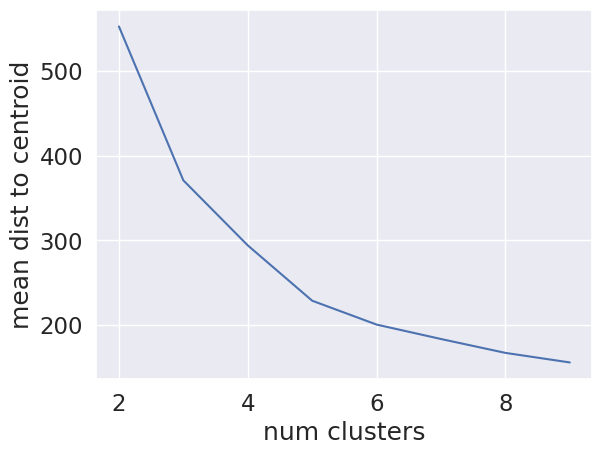

In [24]:
plt.plot(ncluster_meand_dict.keys(), ncluster_meand_dict.values())
plt.xlabel('num clusters')
plt.ylabel('mean dist to centroid')


# Dimensionality Reduction: Principal Component Analysis


##  Goal: Identify Sub-genres of board games

https://boardgamegeek.com/hotness


In [26]:
import pandas as pd

df_game = pd.read_csv('game_final.csv', index_col='game_id')

df_game.head()

description  \
game_id                                                      
174430   Vanquish monsters with strategic cardplay. Ful...   
161936   Mutating diseases are spreading around the wor...   
224517   Build networks, grow industries, and navigate ...   
167791   Compete with rival CEOs to make Mars habitable...   
233078   Build an intergalactic empire through trade, r...   

                                     title  \
game_id                                      
174430                          Gloomhaven   
161936           Pandemic Legacy: Season 1   
224517                   Brass: Birmingham   
167791                   Terraforming Mars   
233078   Twilight Imperium: Fourth Edition   

                                                       url    year player_age  \
game_id                                                                         
174430   https://boardgamegeek.com/boardgame/174430/glo...  2017.0        14+   
161936   https://boardgamegeek.com/boardgame/161936/pan...  2015.0        12+   
224517   https://boardgamegeek.com/boardgame/224517/bra...  2018.0        14+   
167791   https://boardgamegeek.com/boardgame/167791/ter...  2016.0        12+   
233078   https://boardgamegeek.com/boardgame/233078/twi...  2017.0        14+   

         best_players_min  best_players_max  recomm_players_min  \
game_id                                                           
174430                NaN               3.0                 1.0   
161936                NaN               4.0                 2.0   
224517                NaN               4.0                 2.0   
167791                NaN               3.0                 1.0   
233078                NaN               6.0                 3.0   

         recomm_players_max  playtime_min  ...  cat: Trivia  \
game_id                                    ...                
174430                  4.0            60  ...        False   
161936                  4.0            60  ...        False   
224517                  4.0            60  ...        False   
167791                  4.0           120  ...        False   
233078                  6.0           240  ...        False   

         mech: Map Deformation  mech: Measurement Movement  \
game_id                                                      
174430                   False                       False   
161936                   False                       False   
224517                   False                       False   
167791                   False                       False   
233078                   False                       False   

         mech: Auction: Dutch Priority  mech: Single Loser Game  \
game_id                                                           
174430                           False                    False   
161936                           False                    False   
224517                           False                    False   
167791                           False                    False   
233078                           False                    False   

         mech: Stacking and Balancing  mech: Action Timer  \
game_id                                                     
174430                          False               False   
161936                          False               False   
224517                          False               False   
167791                          False               False   
233078                          False               False   

         mech: Physical Removal  mech: Induction  \
game_id                                            
174430                    False            False   
161936                    False            False   
224517                    False            False   
167791                    False            False   
233078                    False            False   

         mech: Ratio / Combat Results Table  
game_id                                      
174430             

In [22]:
sorted(df_game.columns)


['awards',
 'best_players_max',
 'best_players_min',
 'cat: Abstract Strategy',
 'cat: Action / Dexterity',
 'cat: Adventure',
 'cat: Age of Reason',
 'cat: American Civil War',
 'cat: American Indian Wars',
 'cat: American Revolutionary War',
 'cat: American West',
 'cat: Ancient',
 'cat: Animals',
 'cat: Arabian',
 'cat: Aviation / Flight',
 'cat: Bluffing',
 'cat: Card Game',
 "cat: Children's Game",
 'cat: City Building',
 'cat: Civil War',
 'cat: Civilization',
 'cat: Collectible Components',
 'cat: Comic Book / Strip',
 'cat: Deduction',
 'cat: Dice',
 'cat: Economic',
 'cat: Educational',
 'cat: Electronic',
 'cat: Environmental',
 'cat: Expansion for Base-game',
 'cat: Exploration',
 'cat: Fantasy',
 'cat: Farming',
 'cat: Fighting',
 'cat: Horror',
 'cat: Humor',
 'cat: Industry / Manufacturing',
 'cat: Mafia',
 'cat: Math',
 'cat: Mature / Adult',
 'cat: Maze',
 'cat: Medical',
 'cat: Medieval',
 'cat: Memory',
 'cat: Miniatures',
 'cat: Modern Warfare',
 'cat: Movies / TV / 

## K-Means Clustering Board Games

- on raw data
- w/ scale normalizatoin
- w/ PCA features


## Raw Data


In [27]:
from copy import copy

# load data
x_feat_list =  ['difficulty', 'playtime_min', 'playtime_max']  
df_game = pd.read_csv('game_final.csv', index_col='game_id')
df_x = copy(df_game.loc[:, x_feat_list])

df_x.cov()


difficulty  playtime_min  playtime_max
difficulty      0.620904     22.203290     36.301069
playtime_min   22.203290   2702.145161   2807.526419
playtime_max   36.301069   2807.526419   6245.624897

# Scale Normalization

- We can "scale" each feature so that they each have variance of 1
- ... but we're still "double-counting" correlated features


In [28]:
# scale normalization
df_x_sn = copy(df_x)
for col in df_x_sn.columns:
    df_x_sn[col] = df_x_sn[col] / df_x_sn[col].std()
    
# scale normalization ensures "unit variance" (each feature has variance = 1)
# scale normalization does not ensure resulting features are uncorrelated
df_x_sn.cov()


difficulty  playtime_min  playtime_max
difficulty      1.000000      0.542064      0.582934
playtime_min    0.542064      1.000000      0.683410
playtime_max    0.582934      0.683410      1.000000

In [25]:
df_x_sn.corr()


difficulty  playtime_min  playtime_max
difficulty      1.000000      0.542064      0.582934
playtime_min    0.542064      1.000000      0.683410
playtime_max    0.582934      0.683410      1.000000

# PCA (Principal Component Analysis)


In [29]:
from sklearn.decomposition import PCA
import numpy as np

# apply PCA
pca = PCA(whiten=True)
x_pca = pca.fit_transform(df_x.values)

# notice that the covariance matrix below doesn't have labels
# the first feature is not "difficulty" as above (see "No Free Lunch" below)
np.cov(x_pca.T)


array([[ 1.00000000e+00, -1.07549355e-16, -5.73596558e-17],
       [-1.07549355e-16,  1.00000000e+00,  1.86418881e-16],
       [-5.73596558e-17,  1.86418881e-16,  1.00000000e+00]])

Notice that the resulting PCA features each have unit variance and are each uncorrelated (off diagonal elements are zero).  

This property is attractive for methods which utilize distance:
- K-Nearest Neighbors
- K-Means Clustering
as it avoids "double counting" correlated features

Other methods will naturally account for correlated features (or isn't impacted by them) and PCA need not be applied as a preprocessing step:
- Regression
- Decision Tree / Random Forest


## No Free Lunch: PCA features are tough to interpret

PCA removes correlations in its output features by "mixing" input features by scaling and adding them together:
   
    pca0 = scale00 * difficulty + scale01 * playtime_min + scale02 * playtime_max

Where `pca0` is the new first feature (column) of `x_pca` in the example above.  **One major downside to PCA is that this mixing precludes our simple understanding of what a feature means**.  

- Initially, the first feature was `difficulty` of the board game.
- After scale normalization, the first feature was some multiplier times `difficulty` of the board game.
- After PCA, the first feature is ... a bit more difficult to wrap your head around!


## What exactly is going on in PCA?


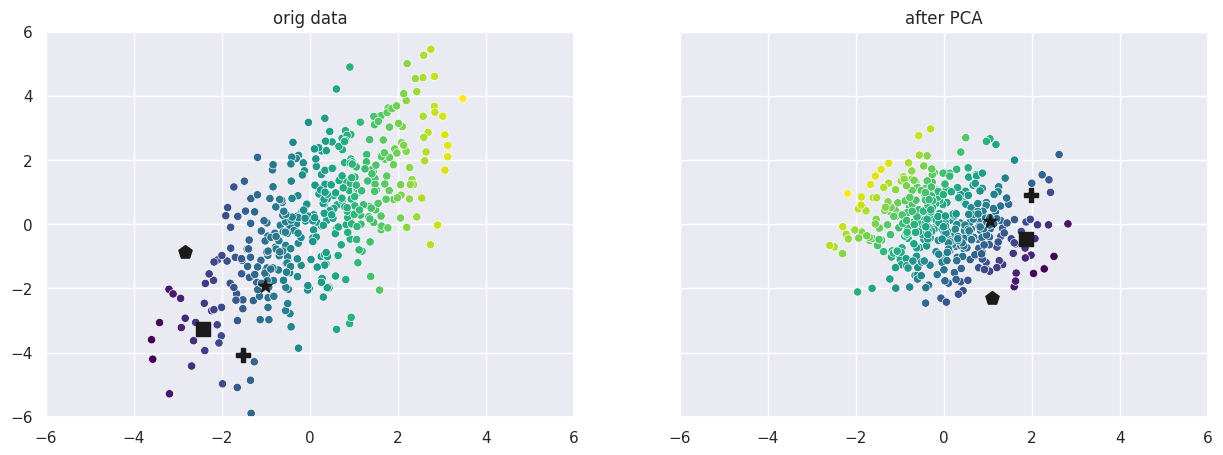

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

n = 400
mean = np.array([0, 0])
cov = np.array([[2, 2],
                [2, 4]])


np.random.seed(0)
x = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

# apply PCA
pca = PCA(whiten=True)
x_prime = pca.fit_transform(x)

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

for _x, label, _ax in zip((x, x_prime),
                         ('orig data', 'after PCA'),
                         axs):
    # plot all data, we add "hue" proportional to original x0 feature
    # to allow viewers to track which points went where under PCA operation
    plt.sca(_ax)
    sns.scatterplot(x=_x[:, 0],y= _x[:, 1], hue=x[:, 0], palette='viridis')
    
    # plot first few points with special markers (again, to track which
    # points moved where under PCA)
    for idx, marker in enumerate('spP*'):
        plt.scatter(_x[idx, 0], _x[idx, 1], color='k', marker=marker, s=100)
        
    # groom plot
    plt.xlim((-6, 6))
    plt.ylim((-6, 6))
    _ax.get_legend().remove()
    _ax.set_title(label)

fig.set_size_inches(15, 5)


(Follow particular samples using the color / symbols above through the transformation)

Notice:
- the diagonal structure on left graph indicates features are correlated
- the circular structure on right graph indicates features are uncorrelated

PCA works by rotating and scaling the dataset around its center to remove correlations.


## So how, exactly, does PCA rotate / scale?

- PCA aligns the direction of maximum variance, orthogonal to *all previous directions (pink line in left plot) with the first axis in output (x axis)
- PCA aligns the direction of maximum variance, orthogonal to all previous directions (red line in left plot) with the second axis in output (y axis)

*there are no previous directions in the first step...

<img src="https://i.ibb.co/XLV2FQW/pca-rotate-axes.png" width=900px>

PCA is looking to "capture" as much variance in the original data as it can with each new feature it adds.  This makes it an attractive dimensionality reduction method:


# What is the `whiten` parameter?

### Brief history:
PCA came from signal processing, where one commonly works on electromagnetic wave data.  "White" refers to a signal having equal energy at all frequencies (or, for the artists among us, the color white can be obtained by mixing other colors in equal proportion).

## So what does `whiten=True` do?

It ensures that the output features all have equal variance (notice scatter is deformed to a circle when `whiten=True`)

## Punchline:

`whiten=False` is likely the way to go for most distance based uses of PCA (K Nearest Neighbors, K Means Clustering).


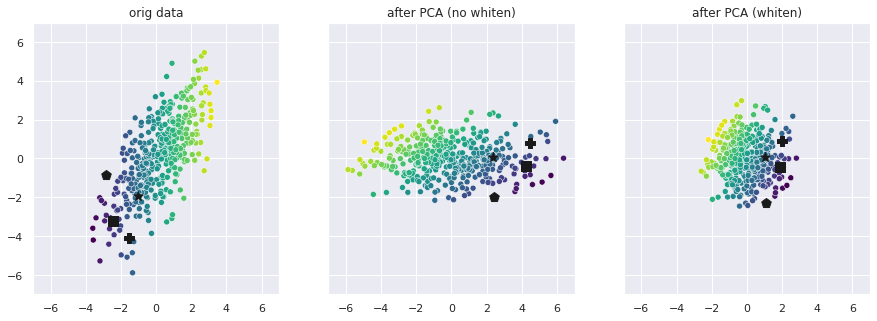

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

n = 400
mean = np.array([0, 0])
cov = np.array([[2, 2],
                [2, 4]])


np.random.seed(0)
x = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

# apply PCA
pca = PCA(whiten=True)
PCA_no_white = PCA(whiten=False)
x_prime_white = pca.fit_transform(x)
x_prime_no_white = PCA_no_white.fit_transform(x)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)

for _x, label, _ax in zip((x, x_prime_no_white, x_prime_white),
                         ('orig data', 'after PCA (no whiten)', 'after PCA (whiten)'),
                         axs):
    # plot all data, we add "hue" proportional to original x0 feature
    # to allow viewers to track which points went where under PCA operation
    plt.sca(_ax)
    sns.scatterplot(x=_x[:, 0],y= _x[:, 1], hue=x[:, 0], palette='viridis')
    
    # plot first few points with special markers (again, to track which
    # points moved where under PCA)
    for idx, marker in enumerate('spP*'):
        plt.scatter(_x[idx, 0], _x[idx, 1], color='k', marker=marker, s=100)
        
    # groom plot
    plt.xlim((-7, 7))
    plt.ylim((-7, 7))
    _ax.get_legend().remove()
    _ax.set_title(label)

fig.set_size_inches(15, 5)


## Besides scale-normalization & removing correlations, whats PCA good for?

Suppose we had 10000 features to our samples, many ML methods would struggle with so many features.  We could apply PCA and only keep the first few `n_components` to try and "capture" as much variance in the original data.

### Motivating use cases:
- PCA "map"
    - use PCA to reduce dimensionality to two dimensions
    - scatter those two dimensions
    - similar samples should be close together
- Compression (eigenfaces)
    - how can we best represent a sample with 10000 features by using only a few?
    - our compressed version will misrepresent original sample a bit ...
    - ... but by using far fewer features it'll use less memory
    
        - storage
        - communication
        - analysis    


## PCA "map"
#### visualizing a 2d map of board games 

- similar board games close
- different games far

## Step 1: Prepping Features


In [31]:
df_game.head()


description  \
game_id                                                      
174430   Vanquish monsters with strategic cardplay. Ful...   
161936   Mutating diseases are spreading around the wor...   
224517   Build networks, grow industries, and navigate ...   
167791   Compete with rival CEOs to make Mars habitable...   
233078   Build an intergalactic empire through trade, r...   

                                     title  \
game_id                                      
174430                          Gloomhaven   
161936           Pandemic Legacy: Season 1   
224517                   Brass: Birmingham   
167791                   Terraforming Mars   
233078   Twilight Imperium: Fourth Edition   

                                                       url    year player_age  \
game_id                                                                         
174430   https://boardgamegeek.com/boardgame/174430/glo...  2017.0        14+   
161936   https://boardgamegeek.com/boardgame/161936/pan...  2015.0        12+   
224517   https://boardgamegeek.com/boardgame/224517/bra...  2018.0        14+   
167791   https://boardgamegeek.com/boardgame/167791/ter...  2016.0        12+   
233078   https://boardgamegeek.com/boardgame/233078/twi...  2017.0        14+   

         best_players_min  best_players_max  recomm_players_min  \
game_id                                                           
174430                NaN               3.0                 1.0   
161936                NaN               4.0                 2.0   
224517                NaN               4.0                 2.0   
167791                NaN               3.0                 1.0   
233078                NaN               6.0                 3.0   

         recomm_players_max  playtime_min  ...  cat: Trivia  \
game_id                                    ...                
174430                  4.0            60  ...        False   
161936                  4.0            60  ...        False   
224517                  4.0            60  ...        False   
167791                  4.0           120  ...        False   
233078                  6.0           240  ...        False   

         mech: Map Deformation  mech: Measurement Movement  \
game_id                                                      
174430                   False                       False   
161936                   False                       False   
224517                   False                       False   
167791                   False                       False   
233078                   False                       False   

         mech: Auction: Dutch Priority  mech: Single Loser Game  \
game_id                                                           
174430                           False                    False   
161936                           False                    False   
224517                           False                    False   
167791                           False                    False   
233078                           False                    False   

         mech: Stacking and Balancing  mech: Action Timer  \
game_id                                                     
174430                          False               False   
161936                          False               False   
224517                          False               False   
167791                          False               False   
233078                          False               False   

         mech: Physical Removal  mech: Induction  \
game_id                                            
174430                    False            False   
161936                    False            False   
224517                    False            False   
167791                    False            False   
233078                    False            False   

         mech: Ratio / Combat Results Table  
game_id                                      
174430             

In [32]:
# this tuple defines default tag prefixes
# (for a nicer implementation, reader after python namespaces)
tag_prefix_tup = 'cat: ', 

def is_tag(feat, tag_prefix_tup=tag_prefix_tup):
    """ returns true if a given feature is a tag
    """
    for tag_prefix in tag_prefix_tup:
        if feat.startswith(tag_prefix):
            return True
        
    return False

def strip_tag(feat, tag_prefix_tup=tag_prefix_tup):
    """ reatures feature having removed any tag_prefixes
    """
    for tag_prefix in tag_prefix_tup:
        if feat.startswith(tag_prefix):
            feat = feat[len(tag_prefix):]
    
    return feat

def get_game_tag_tuple(game_row, tag_list=None):
    """ builds a list of all tags which a game has
    """
    if tag_list is None:
        # re-compute
        tag_list = list(filter(is_tag, df_game.columns))
    
    # collect all tags of a particular game
    game_tag_list = list()
    for feat in tag_list:
        if game_row[feat]:
            game_tag_list.append(strip_tag(feat))
            
    return tuple(game_tag_list)


In [33]:
tag_list = list(filter(is_tag, df_game.columns))
df_cat_bool = df_game.loc[:, tag_list]
df_cat_bool.head()


cat: Adventure  cat: Exploration  cat: Fantasy  cat: Fighting  \
game_id                                                                  
174430             True              True          True           True   
161936            False             False         False          False   
224517            False             False         False          False   
167791            False             False         False          False   
233078            False              True         False          False   

         cat: Miniatures  cat: Environmental  cat: Medical  cat: Economic  \
game_id                                                                     
174430              True               False         False          False   
161936             False                True          True          False   
224517             False               False         False           True   
167791             False                True         False           True   
233078             False               False         False           True   

         cat: Industry / Manufacturing  cat: Transportation  ...  \
game_id                                                      ...   
174430                           False                False  ...   
161936                           False                False  ...   
224517                            True                 True  ...   
167791                            True                False  ...   
233078                           False                False  ...   

         cat: American Indian Wars  cat: Napoleonic  \
game_id                                               
174430                       False            False   
161936                       False            False   
224517                       False            False   
167791                       False            False   
233078                       False            False   

         cat: American Revolutionary War  cat: Children's Game  cat: Memory  \
game_id                                                                       
174430                             False                 False        False   
161936                             False                 False        False   
224517                             False                 False        False   
167791                             False                 False        False   
233078                             False                 False        False   

         cat: American Civil War  cat: Vietnam War  cat: Math  cat: Number  \
game_id                                                                      
174430                     False             False      False        False   
161936                     False             False      False        False   
224517                     False             False      False        False   
167791                     False             False      False        False   
233078                     False             False      False        False   

         cat: Trivia  
game_id               
174430         False  
161936         False  
224517         False  
167791         False  
233078         False  

[5 rows x 79 columns]

# Step 2: Building Map 


In [34]:
from sklearn.decomposition import PCA
import plotly.express as px

x = df_cat_bool.to_numpy()
pca = PCA(n_components=2, whiten=True)
x_compress = pca.fit_transform(x)


In [33]:
x.shape


(992, 79)

In [35]:
# notice: we have "compressed" 250 features into only 2 (as best we can)
x_compress.shape


(992, 2)

In [36]:
df_game['pca0'] = x_compress[:, 0]
df_game['pca1'] = x_compress[:, 1]

df_game['game_tag_list'] = df_game.apply(get_game_tag_tuple, axis=1)
fig = px.scatter(df_game, x='pca0', y='pca1', hover_data=['title', 'game_tag_list'])
fig.write_html('pca_board_game.html')


# view the graph we just made in the cell above

(tip: html files are nice to share graphs, everybody has a web browser on their computer to open them, no python needed)

[pca_board_game.html](pca_board_game.html)


# In Class* Assignment

*we likely won't have time to do this in class.  Regardless, please do not submit this with today's ICA.

Build a two dimensional PCA "map" of all the cars in the 'mpg' seaborn dataset.

Be sure to:
- use `x_feat_list = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']` as PCA inputs
- scatter via plotly so you can scroll over and examine the cars
- include `hover_data` as all relevant columns
- color each sample according to the `model_year`


In [37]:
df_car = sns.load_dataset('mpg')
df_car.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [38]:
# solution
from sklearn.decomposition import PCA
import plotly.express as px

x_feat_list = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# discard rows with missing data
df_car.dropna(how='any', inplace=True)

# extract relevant x values
x = df_car.loc[:, x_feat_list].values

# compress
pca = PCA(n_components=2, whiten=False)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_car['pca0'] = x_compress[:, 0]
df_car['pca1'] = x_compress[:, 1]

# scatter plot
hover_data = ['name', 'model_year'] + x_feat_list
px.scatter(df_car, x='pca0', y='pca1', hover_data=hover_data, title='cars')
